In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pylab

from scipy.misc import derivative
from scipy.misc import electrocardiogram
from scipy.optimize import fmin, brute
from scipy.signal import find_peaks

### Задание 1

Придумайте функции со следующими свойствами (в a) b) c) область определения X любая, какая вам удобна, главное - функция с нужными свойствами):

a) бесконечное количество локальных экстремумов

b) 2 локальных экстремума

с) 3 локальных экстремума

d*) область определения функции - 1 точка

**Бесконечное количество локальных экстремумов**

Достаточно взять любую циклическую функцию с комбинацией монотонной функции, например синус или косинус.  
Сами про себе синус и косинус являются циклическими и имеют бесконечное число экстремумов, но это тривиально.

Возьмем функцию 
$f(x) = sin(x) * x$

In [2]:
def f(x):
    return np.sin(x)*x

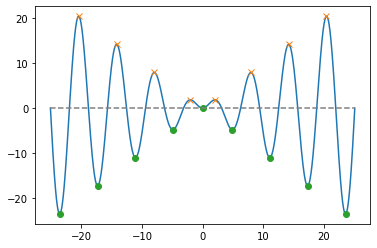

In [3]:
# Строим функцию
x = np.linspace(-8*np.pi, 8*np.pi, 1000)
y = [f(x[i]) for i in range(len(x))]
plt.plot(x,y)

# Находим пики
y_turned = [f(x[i]) for i in range(len(x))]
peaks, _ = find_peaks(y_turned)
y = [f(x[peaks[i]]) for i in range(len(peaks))]
plt.plot(x[peaks], y, "x")

# Находим минимумы, через переворот функции
y_turned = [-f(x[i]) for i in range(len(x))]
peaks, _ = find_peaks(y_turned)
y = [f(x[peaks[i]]) for i in range(len(peaks))]
plt.plot(x[peaks], y, "o")

plt.plot(x, np.zeros_like(x), "--", color="gray")
plt.show()

Можно показать, что число экстремумов бесконечно другим способом.  
Используя тот факт, что значение производной функции равно нулю в точке экстремума функции

Посчитаем производную

In [4]:
from sympy import diff, symbols, sin
x, y = symbols('x y')
diff(sin(x)*x)

x*cos(x) + sin(x)

Построим на ее основе функцию

In [5]:
def f_stroke(x):
    return np.sin(x)+np.cos(x)*x

Построим график полученной функции. Точки пересечения кривой с осью абсцисс, дадут расположения экстремумов у первичной функции 

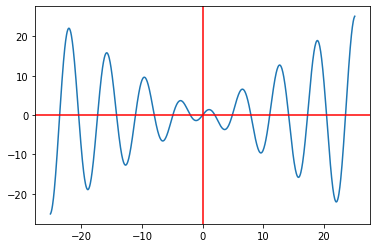

In [6]:
x = np.linspace(-8*np.pi, 8*np.pi, 1000)
y = [f_stroke(x[i]) for i in range(len(x))]
plt.plot(x,y)
plt.axvline(0, color='r')
plt.axhline(0, color='r')
plt.show()

Не стоит наверное говорить, что у полученной функции тоже бесконечное число экстремумов ))

 **2 локальных экстремума**

Здесь нам хватит полинома третьего порядка

 $f(x) = x^3 - x$

In [7]:
def f(x):
    return x**3-x

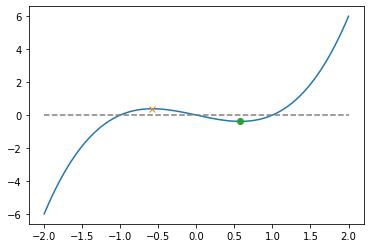

In [8]:
# Строим функцию
x = np.linspace(-2, 2, 1000)
y = [f(x[i]) for i in range(len(x))]
plt.plot(x,y)

# Находим пики
y_turned = [f(x[i]) for i in range(len(x))]
peaks, _ = find_peaks(y_turned)
y = [f(x[peaks[i]]) for i in range(len(peaks))]
plt.plot(x[peaks], y, "x")

# Находим минимумы, через переворот функции
y_turned = [-f(x[i]) for i in range(len(x))]
peaks, _ = find_peaks(y_turned)
y = [f(x[peaks[i]]) for i in range(len(peaks))]
plt.plot(x[peaks], y, "o")

plt.plot(x, np.zeros_like(x), "--", color="gray")
plt.show()

**3 локальных экстремума**

Нам нужен полином четвертого порядка

In [9]:
def f(x):
    return (x-3)*(x-4)*(x-5)*(x-1)

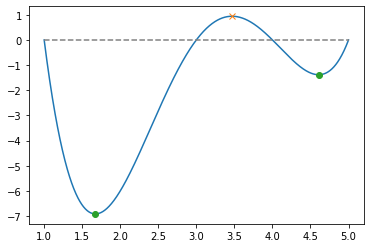

In [10]:
# Строим функцию
x = np.linspace(1, 5, 1000)
y = [f(x[i]) for i in range(len(x))]
plt.plot(x,y)

# Находим пики
y_turned = [f(x[i]) for i in range(len(x))]
peaks, _ = find_peaks(y_turned)
y = [f(x[peaks[i]]) for i in range(len(peaks))]
plt.plot(x[peaks], y, "x")

# Находим минимумы, через переворот функции
y_turned = [-f(x[i]) for i in range(len(x))]
peaks, _ = find_peaks(y_turned)
y = [f(x[peaks[i]]) for i in range(len(peaks))]
plt.plot(x[peaks], y, "o")

plt.plot(x, np.zeros_like(x), "--", color="gray")
plt.show()

**Область определения функции - 1 точка**

$f(x) = \sqrt{-(x^2)}$  
Данная функция равна 0 в точке x = 0. В остальных точках такая функция в вещественных числах не описывается.

### Задание 2:

Посчитайте 1-ую и 2-ую производные следующих функций (на бумажке:)):

a) $f(x) = sin^2(2x+1)$

b) $f(x) = ln(x^3+2sin(x))$ (выражение второй производной упрощать не нужно)

In [11]:
from IPython.display import display, Image

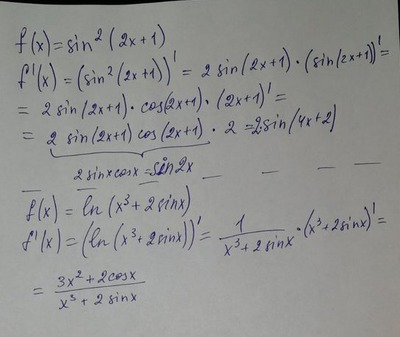

In [12]:
Image('HW.jpg')

In [13]:
from sympy import diff, symbols, sin
x, y = symbols('x y')
diff(sin(2*x+1)*sin(2*x+1))

4*sin(2*x + 1)*cos(2*x + 1)

In [14]:
from sympy import diff, symbols, sin, ln
x, y = symbols('x y')
diff(ln(x**3+2*sin(x)))

(3*x**2 + 2*cos(x))/(x**3 + 2*sin(x))

### Задание 3:

Используя numpy, посчитайте значение 3-ей и 4-ой производных функций в точке:

$f(x) = x^5+4sin(2x)+cos(3x+3)$ в точке $x=1$


**Первый вариант решения**

Через инструмент SciPy - derivative

Это не совсем отвечает поставленному заданию, хотя NumPy тоже используется

Данный инструмент позволяет напрямую найти только первую и вторую производные, сделаем это для того  
чтобы в дальнейшем сравнивать с ними наши результаты

In [15]:
from scipy.misc import derivative
def f(x):
    return x**5 + 4*np.sin(2*x)+np.cos(3*x+3)

In [18]:
print("Первая производная", derivative(f, 1, dx=1e-6, n = 1))

Первая производная 2.509071801881646


In [19]:
print("Вторая производная", derivative(f, 1, dx=1e-6, n = 2))

Вторая производная -3.19033688356285


Напишем несколько функций

In [20]:
def f_s(x):
    return derivative(f, x, dx=1e-6)

In [21]:
def f_ss(x):
    return derivative(f_s, x, dx=1e-6)

In [22]:
def f_sss(x):
    return derivative(f_ss, x, dx=1e-6)

In [23]:
def f_ssss(x):
    return derivative(f_sss, x, dx=1e-6)

In [26]:
print('Производные')
print('Первая:',f_s(1),'Вторая:',f_ss(1))
print('Третья:',f_sss(1),'Четвертая:',f_ssss(1))

Производные
Первая: 2.509071801881646 Вторая: -3.1907809727727
Третья: 111.02230246251565 Четвертая: 333066907.38754696


Первая и вторая производная совпадают с ранее расчитанными.

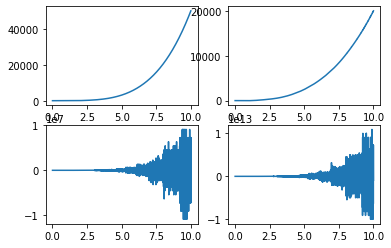

In [27]:
x = np.linspace(0, 10, 10000)
y_s = [f_s(x[i]) for i in range(len(x))]
y_ss = [f_ss(x[i]) for i in range(len(x))]
y_sss = [f_sss(x[i]) for i in range(len(x))]
y_ssss = [f_ssss(x[i]) for i in range(len(x))]

plt.subplot(2,2,1)
plt.plot(x,y_s)

plt.subplot(2,2,2)
plt.plot(x,y_ss)

plt.subplot(2,2,3)
plt.plot(x,y_sss)

plt.subplot(2,2,4)
plt.plot(x,y_ssss)

plt.show()

Есть сомнения в правильности расчета третьей и четвертой производной

Поэтому попробуем способ с использованием инструмента NumPy

**Второй способ, через numpy**

In [31]:
x = np.linspace(0, 10, 10000)
y = [f(x[i]) for i in range(len(x))]
y_s = np.diff(y,1)
y_ss = np.diff(y,2)
y_sss = np.diff(y,3)
y_ssss = np.diff(y,4)

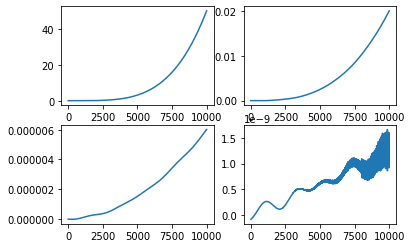

In [36]:
plt.subplot(2,2,1)
plt.plot(y_s)

plt.subplot(2,2,2)
plt.plot(y_ss)

plt.subplot(2,2,3)
plt.plot(y_sss)

plt.subplot(2,2,4)
plt.plot(y_ssss)

plt.show()

Графики лучше, можно предположить, что третья и четвертая производная в искомой точке будут расчитаны точнее

In [37]:
print('Первая производная:',y_s[1000]/1e-3,'Вторая производная:',y_ss[1000]/1e-6)
print('Третья производная:',y_sss[1000]/1e-9,'Четвертая производная:',y_ssss[1000]/1e-12)

Первая производная: 2.5074227763193235 Вторая производная: -3.118381822098115
Третья производная: 66.20212023022987 Четвертая производная: 256.34960820752895


Первая и вторая производные почти совпадают с предыдущим расчетом. Третья и четвертая (искомые) - отличаются.

**Судя по графикам и из сравнения результатов уверенности в том, что тот или иной расчет правильны у нас нет.**

**И кстати, с NumPy я сильно намаялся пока подобрал более параметры позволяющие строить плавные графики,  
этот результат вымученный и получается он не сразу.**

**Поэтому, попробуем решить задачу аналитически, благо для данной функции можно найти аналитическое решение для каждой производной**

In [48]:
def derivatives(x,n):
    if n == 0:
        y = x**5 + 4*np.sin(2*x) + np.cos(3*x+3)
    elif n == 1:
        y = 5*x**4 + 4*2*np.cos(2*x) - 3*np.sin(3*x+3)
    elif n == 2:
        y = 5*4*x**3 - 4*2*2*np.sin(2*x) - 3*3*np.cos(3*x+3)
    elif n == 3:
        y = 5*4*3*x**2 - 4*2*2*2*np.cos(2*x) + 3*3*3*np.sin(3*x+3)
    elif n == 4:
        y = 5*4*3*2*x + 4*2*2*2*2*np.sin(2*x) + 3*3*3*3*np.cos(3*x+3)
    else:
        y = 'Выходит за рамки задания. Итак, устал уже.'
    return y    

In [41]:
derivatives(1,1)

2.5090718022196383

In [42]:
derivatives(1,2)

-3.1902914090642014

In [43]:
derivatives(1,3)

65.77248031813757

In [44]:
derivatives(1,4)

255.9688285355233

In [49]:
derivatives(1,6)

'Выходит за рамки задания. Итак, устал уже.'

In [50]:
derivatives(1,0)

5.597359993953093

In [62]:
x = np.linspace(0, 10, 10000)
y_s = [derivatives(x[i],1) for i in range(len(x))]
y_ss = [derivatives(x[i],2) for i in range(len(x))]
y_sss = [derivatives(x[i],3) for i in range(len(x))]
y_ssss = [derivatives(x[i],4) for i in range(len(x))]

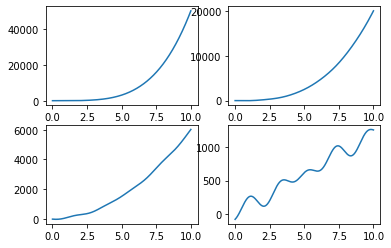

In [53]:
plt.subplot(2,2,1)
plt.plot(x,y_s)

plt.subplot(2,2,2)
plt.plot(x,y_ss)

plt.subplot(2,2,3)
plt.plot(x,y_sss)

plt.subplot(2,2,4)
plt.plot(x,y_ssss)

plt.show()

# Красота

In [63]:
print('Первая производная:',derivatives(1,1),'Вторая производная:',derivatives(1,2))
print('Третья производная:',derivatives(1,3),'Четвертая производная:',derivatives(1,4))

Первая производная: 2.5090718022196383 Вторая производная: -3.1902914090642014
Третья производная: 65.77248031813757 Четвертая производная: 255.9688285355233


**Для первой и второй производной более точен первый способ (через SciPy), для третьей и четвертой второй способ (через NumPy)**

В принципе, оба способа для привычных функций должны работать удовлетворительно, но функция в задании подобрана больно уж хитро.  
Она имеет множество экстремумов, но они подавляются быстрорастущим полиномиальным членом пятой степени. При дифференцировании численными методами  
вклад циклических функций очень быстро становится соизмеримым с ошибкой вычисления.

# Спасибо, было интересно